# PANDAS

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_pop=pd.Series([320,70,8,1200],index=["USA","France","Suisse","Chine"])
serie_pop.iloc[1]

70

In [3]:
serie_pop["France"]

70

In [4]:
serie_pop.to_dict()

{'USA': 320, 'France': 70, 'Suisse': 8, 'Chine': 1200}

In [5]:
serie_pop2=pd.Series({'USA': 320, 'France': 70, 'Suisse': 8, 'Chine': 1200})

In [6]:
serie_pop2

USA        320
France      70
Suisse       8
Chine     1200
dtype: int64

In [7]:
serie_pop[(serie_pop>50)&(serie_pop<100)]

France    70
dtype: int64

In [8]:
serie_pop[(serie_pop<50)|(serie_pop>100)]

USA        320
Suisse       8
Chine     1200
dtype: int64

Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [9]:
serie_pop.name="Populations"
serie_pop.index.name="Pays"

In [10]:
serie_pop

Pays
USA        320
France      70
Suisse       8
Chine     1200
Name: Populations, dtype: int64

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui.


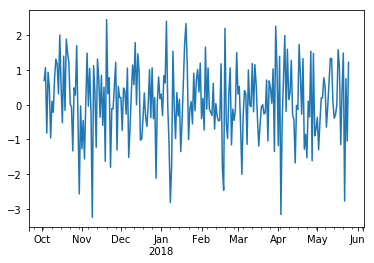

In [11]:
import datetime

dates=pd.date_range("2017-10-03",datetime.date.today(),freq="D")
array1=np.random.randn(len(dates))
pd.Series(array1 ,index=dates ).plot()

In [12]:
dates.shape

(235,)

In [14]:
pd.datetime.now()==datetime.datetime.now()

True

Créez un objet Series avec des résultats par trimestres à partir de 2012.


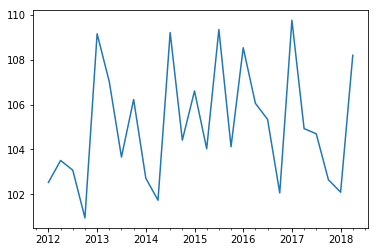

In [18]:
trimestres=pd.period_range("2012",pd.datetime.now(),freq="Q")
pd.Series(np.random.random(size=len(trimestres))*10+100,index=trimestres,name="Résultats").plot()

Construire un dictionnaire avec des produits et des prix puis afficher le DataFrame obtenu en transformant ce dictionnaire


In [24]:
dico_prix = {"Marque":["Apple" , "Microsoft", "ASUS", "DELL"], "Prix":[1000, 800, 800, 900]}

In [25]:
pd.DataFrame(dico_prix)

,Marque,Prix
0,Apple,1000
1,Microsoft,800
2,ASUS,800
3,DELL,900


Récupérez les données de Wikipédia sur les résultats de NBA et obtenir les statistiques descriptives pour les variables quantitatives.
On utilisera plutôt Chrome ou Firefox pour ce type de tâches (éviter IE)


Les données sont aussi disponibles dans ../data/NBA1.csv

In [26]:
import webbrowser
url='https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records'
webbrowser.open(url)

True

In [27]:
frame_nba=pd.read_clipboard()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\clipboards.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_table(StringIO(text), sep=sep, **kwargs)


In [28]:
frame_nba.head()

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
0,1,San Antonio Spurs,"2,114","1,282",0.622,1976–77,"3,396",Southwest
1,2,Boston Celtics,"3,329","2,313",0.590,1946–47,"5,642",Atlantic
2,3,Los Angeles Lakers,"3,296","2,237",0.586,1948–49,"5,533",Pacific
3,4,Oklahoma City Thunder,"2,234","1,900",0.540,1967–68,"4,134",Northwest
4,5,Utah Jazz,"1,914","1,646",0.538,1974–75,"3,560",Northwest


In [29]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA season    30 non-null object
Total games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [30]:
frame_nba.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Pct.', 'First NBA season',
       'Total games', 'Division'],
      dtype='object')

In [31]:
#accès à une colonne
frame_nba["Won"]
frame_nba.Won

0     2,114
1     3,329
2     3,296
3     2,234
4     1,914
5     2,081
6     2,167
7     2,172
8     1,255
9     2,183
10    2,806
11    2,069
12    1,539
13    1,696
14    2,717
15    2,761
16    2,692
17    1,649
18    2,715
19    1,116
20      610
21    1,829
22      844
23    2,523
24    2,096
25      988
26    1,408
27      759
28    1,562
29      925
Name: Won, dtype: object

In [32]:
#extraction d'un sous-DataFrame
frame_nba[["Won","Lost"]]

,Won,Lost
0,"2,114","1,282"
1,"3,329","2,313"
2,"3,296","2,237"
3,"2,234","1,900"
4,"1,914","1,646"
5,"2,081","1,807"
6,"2,167","1,885"
7,"2,172","1,962"
8,"1,255","1,157"
9,"2,183","2,032"


In [33]:
#condition sur un DataFrame (filtre)
frame_nba[frame_nba["Pct."]>0.5]

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
0,1,San Antonio Spurs,"2,114","1,282",0.622,1976–77,"3,396",Southwest
1,2,Boston Celtics,"3,329","2,313",0.590,1946–47,"5,642",Atlantic
2,3,Los Angeles Lakers,"3,296","2,237",0.586,1948–49,"5,533",Pacific
3,4,Oklahoma City Thunder,"2,234","1,900",0.540,1967–68,"4,134",Northwest
4,5,Utah Jazz,"1,914","1,646",0.538,1974–75,"3,560",Northwest
5,6,Portland Trail Blazers,"2,081","1,807",0.535,1970–71,"3,888",Northwest
6,7,Phoenix Suns,"2,167","1,885",0.535,1968–69,"4,052",Pacific
7,8,Houston Rockets,"2,172","1,962",0.525,1967–68,"4,134",Southwest
8,9,Miami Heat,"1,255","1,157",0.520,1988–89,"2,412",Southeast
9,10,Chicago Bulls,"2,183","2,032",0.518,1966–67,"4,215",Central


In [34]:
# manipulation de chaînes de caractères dans un DataFrame
frame_nba["First NBA season"].str[:4]

0     1976
1     1946
2     1948
3     1967
4     1974
5     1970
6     1968
7     1967
8     1988
9     1966
10    1949
11    1968
12    1980
13    1976
14    1949
15    1946
16    1948
17    1976
18    1946
19    1989
20    2002
21    1970
22    1995
23    1948
24    1961
25    1988
26    1976
27    1995
28    1970
29    1989
Name: First NBA season, dtype: object

In [35]:
def nettoyage_frame(frame):
    """Cette fonction permet d'éliminer les séparateurs de milliers ,"""
    for col in frame.columns:
        if frame[col].dtype==object:
            frame[col]=pd.to_numeric(frame[col].str.replace(",",""),errors='ignore')
    return frame

In [36]:
frame_nba=nettoyage_frame(frame_nba)

In [37]:
frame_nba.describe(include="all")

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
count,30.000000,30,30.000000,30.000000,30.000000,30,30.000000,30
unique,NaN,30,NaN,NaN,NaN,16,NaN,6
top,NaN,Denver Nuggets,NaN,NaN,NaN,1976–77,NaN,Atlantic
freq,NaN,1,NaN,NaN,NaN,4,NaN,5
mean,15.500000,NaN,1934.966667,1925.833333,0.494433,NaN,3860.800000,NaN
std,8.803408,NaN,738.977461,632.989899,0.053790,NaN,1309.153541,NaN
min,1.000000,NaN,610.000000,686.000000,0.397000,NaN,1296.000000,NaN
25%,8.250000,NaN,1440.750000,1436.000000,0.461750,NaN,3149.750000,NaN
50%,15.500000,NaN,2075.000000,1931.000000,0.493500,NaN,3888.000000,NaN
75%,22.750000,NaN,2450.750000,2322.750000,0.523750,NaN,5254.750000,NaN


In [39]:
# accéder à des éléments indexés (position)
frame_nba.iloc[4,1]

'Utah Jazz'

In [40]:
# accéder à des éléments indexés (index)
frame_nba.loc[5,"Team"]

'Portland Trail Blazers'

Trier les données NBA en fonction de la variable Pct.


In [41]:
frame_nba.sort_values("Pct.")

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
29,30,Minnesota Timberwolves,925,1405,0.397,1989–90,2330,Northwest
28,29,Los Angeles Clippers,1562,2326,0.402,1970–71,3888,Pacific
27,28,Memphis Grizzlies,759,1079,0.413,1995–96,1838,Southwest
26,27,Brooklyn Nets,1408,1988,0.415,1976–77,3396,Atlantic
25,26,Charlotte Hornets,988,1260,0.440,1988–89[a],2248,Southeast
24,25,Washington Wizards,2096,2519,0.454,1961–62,4615,Southeast
23,24,Sacramento Kings,2523,3010,0.456,1948–49,5533,Pacific
22,23,Toronto Raptors,844,994,0.459,1995–96,1838,Atlantic
21,22,Cleveland Cavaliers,1829,2059,0.470,1970–71,3888,Central
20,21,New Orleans Pelicans,610,686,0.471,2002–03[a],1296,Southwest


Obtenir les différentes statistiques descriptives pour les données NBA.


In [42]:
frame_nba.mean()

Rank             15.500000
Won            1934.966667
Lost           1925.833333
Pct.              0.494433
Total games    3860.800000
dtype: float64

In [43]:
frame_nba.agg(["mean","var", "median"])

,Rank,Won,Lost,Pct.,Total games
mean,15.5,1934.966667,1925.833333,0.494433,3.860800e+03
var,77.5,546087.688506,400676.212644,0.002893,1.713883e+06
median,15.5,2075.000000,1931.000000,0.493500,3.888000e+03


In [44]:
frame_nba[(frame_nba["Division"]=="Atlantic")|(frame_nba["Division"]=="Pacific")]["Total games"].sum()

46627

In [45]:
frame_nba["sommeWonLost"]=frame_nba["Won"]+frame_nba["Lost"]

Importez le fichier airbnb.csv depuis Python dans airbnb.


In [46]:
airbnb=pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
airbnb.shape

(56535, 95)

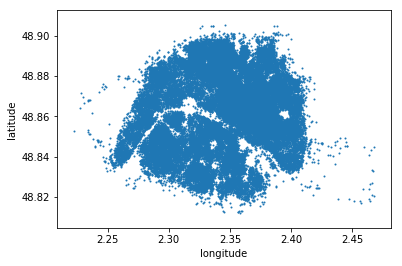

In [48]:
# on peut représenter les points de ce jeu de données
airbnb.plot("longitude","latitude",kind="scatter",s=1)

Importez un tableau en html depuis la page <br>
http://www.fdic.gov/bank/individual/failed/banklist.html 


In [49]:
bank=pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [50]:
type(bank)

list

In [51]:
bank[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","March 7, 2018"
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
8,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","September 25, 2017"
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","June 1, 2017"


In [52]:
# on peut aussi récupérer les données de NBA
nba=pd.read_html("https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records",header="infer")

In [53]:
len(nba)

10

In [54]:
nba[1]

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
0,1,San Antonio Spurs,2114,1282,0.622,1976–77,3396,Southwest
1,2,Boston Celtics,3329,2313,0.590,1946–47,5642,Atlantic
2,3,Los Angeles Lakers,3296,2237,0.586,1948–49,5533,Pacific
3,4,Oklahoma City Thunder,2234,1900,0.540,1967–68,4134,Northwest
4,5,Utah Jazz,1914,1646,0.538,1974–75,3560,Northwest
5,6,Portland Trail Blazers,2081,1807,0.535,1970–71,3888,Northwest
6,7,Phoenix Suns,2167,1885,0.535,1968–69,4052,Pacific
7,8,Houston Rockets,2172,1962,0.525,1967–68,4134,Southwest
8,9,Miami Heat,1255,1157,0.520,1988–89,2412,Southeast
9,10,Chicago Bulls,2183,2032,0.518,1966–67,4215,Central


Importez un fichier Excel depuis python. On utilisera credit2.xlsx


In [55]:
#aaproche 1
frame_credit=pd.read_excel("../data/credit2.xlsx",usecols="A:C")

In [56]:
#approche 2
excel_credit=pd.ExcelFile("../data/credit2.xlsx")

In [57]:
excel_credit.sheet_names

['Sheet1', 'Feuil1']

In [58]:
frame_credit2=excel_credit.parse(excel_credit.sheet_names[1])

In [59]:
frame_credit2

,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio
0,6,37,56
1,13,30,56
2,9,33,57
3,7,30,62
4,7,27,64
5,10,28,60
6,10,40,48
7,4,36,58
8,15,31,52
9,12,29,57


Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 


In [60]:
from sqlalchemy import create_engine

In [61]:
engine=create_engine("sqlite:///../data/salaries.sqlite")

In [62]:
engine.table_names()

['Salaries']

In [63]:
frame_salaires=pd.read_sql_query("SELECT * FROM Salaries",engine)

In [64]:
frame_salaires.shape

(148654, 13)

In [65]:
frame_salaires.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [66]:
frame_salaires.loc[frame_salaires["TotalPay"].idxmax()]

Id                                                               1
EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                          
TotalPay                                                    567595
TotalPayBenefits                                            567595
Year                                                          2011
Notes                                                             
Agency                                               San Francisco
Status                                                            
Name: 0, dtype: object

In [67]:
frame_salaires.sort_values(["JobTitle","TotalPay"],ascending=[True,False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.8,10753.1,0,,60530.87,60530.87,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24132,24133,LI-XIN CAI,ACCOUNT CLERK,49777.8,1390.45,624,,51792.25,51792.25,2011,,San Francisco,
24174,24175,LOLA THOMAS,ACCOUNT CLERK,49690.5,1356.88,622.87,,51670.27,51670.27,2011,,San Francisco,
24264,24265,TUONG TRUONG,ACCOUNT CLERK,49777.8,0,1618,,51395.80,51395.80,2011,,San Francisco,
24329,24330,AUDREY LEONG,ACCOUNT CLERK,49777.8,0,1440,,51217.78,51217.78,2011,,San Francisco,
24364,24365,WINNIE FUNG,ACCOUNT CLERK,49777.8,0,1300,,51077.78,51077.78,2011,,San Francisco,
24374,24375,ELAINE QUAN,ACCOUNT CLERK,49777.8,0,1285.5,,51063.32,51063.32,2011,,San Francisco,


In [68]:
frame_salaires["JobTitle"].str.lower().value_counts()

transit operator                                   9424
special nurse                                      5791
registered nurse                                   4955
custodian                                          3214
firefighter                                        3153
recreation leader                                  2663
deputy sheriff                                     2618
public svc aide-public works                       2518
police officer 3                                   2421
patient care assistant                             1945
public service trainee                             1656
attorney (civil/criminal)                          1503
police officer                                     1476
porter                                             1465
general laborer                                    1410
gardener                                           1187
police officer 2                                   1141
parking control officer                         

On peut construire facilement des tableaux croisés

In [69]:
#cross-tab
pd.crosstab([frame_salaires["Year"],frame_salaires["JobTitle"]],frame_salaires["Agency"],
            values=frame_salaires["TotalPay"],
            aggfunc=["mean","sum"])

mean  \
Agency                                                   San Francisco   
Year JobTitle                                                            
2011 ACCOUNT CLERK                                        44035.664337   
     ACCOUNTANT                                           47429.268000   
     ACCOUNTANT INTERN                                    29031.742917   
     ACUPUNCTURIST                                        67594.400000   
     ADMINISTRATIVE ANALYST                               63954.867527   
     ADMINISTRATIVE ANALYST II                            61497.035000   
     ADMINISTRATIVE ANALYST III                           92698.515000   
     ADMINISTRATIVE ENGINEER                             127961.430000   
     ADMINISTRATIVE SERVICES MANAGER                      77015.580000   
     ADMINISTRATOR, SFGH MEDICAL CENTER                  257124.440000   
     AFFIRMATIVE ACTION SPECIALIST                        68213.983333   
     AGRICULTURAL INSPECTOR                               53586.100000   
     AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI    1927.500000   
     AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS        15420.000000   
     AIRPORT COMMUNICATIONS OPERATOR                      81214.809630   
     AIRPORT COMMUNICATIONS SUPERVISOR                    88180.000000   
     AIRPORT ECONOMIC PLANNER                            108264.821538   
     AIRPORT ELECTRICIAN                                 108707.828235   
     AIRPORT ELECTRICIAN SUPERVISOR                      117088.760000   
     AIRPORT EMERGENCY PLANNING COORDINATOR               75865.935000   
     AIRPORT MECHANICAL MAINTENANCE SUPERVISOR           128534.170000   
     AIRPORT NOISE ABATEMENT SPECIALIST                   49497.225000   
     AIRPORT OPERATIONS SUPERVISOR                        94913.980000   
     AIRPORT POLICE SERVICES AIDE                         60129.931283   
     AIRPORT PROPERTY SPECIALIST I                        77681.843077   
     AIRPORT SAFETY OFFICER                               74599.264250   
     ANESTHETIST                                         112265.260400   
     ANIMAL CARE ASSISTANT SUPERVISOR                     56298.620000   
     ANIMAL CARE ATTENDANT                                43780.723571   
     ANIMAL CARE SUPERVISOR                               73618.870000   
...                                                                ...   
2014 Victim/Witness Investigator 2                        66114.201429   
     Victim/Witness Investigator 3                        79304.475625   
     Volunteer/Outreach Coord                             56234.389231   
     Wastewater Control Inspector                         83239.635000   
     Water & Power Maint Sprv 1                          100359.140000   
     Water Conservation Admin                            117050.135000   
     Water Const&Main Supt                               182501.250000   
     Water Meter Repairer                                 62954.966667   
     Water Meter Shop Supervisor 1                        85677.150000   
     Water Operations Analyst                            106234.400000   
     Water Quality Tech III                               74050.117500   
     Water Quality Technician                             68884.900938   
     Water QualityTech I/II                                3977.040000   
     Water Service Inspector                              87644.204828   
     Watershed Forester                                   99998.015000   
     Watershed Keeper                                     67837.735000   
     Watershed Keeper Supervisor                          87553.830000   
     Watershed Worker (Seasonal)                          10246.758519   
     Welder                                               98686.176667   
     Welfare Fraud Investigator                           81570.411667   
     Wharfinger 1                                         67297.460000

In [70]:
#pivot-tab
frame_salaires.pivot_table(["TotalPay"],["Year","JobTitle"],["Agency"],aggfunc=["mean","sum"])

mean  \
                                                              TotalPay   
Agency                                                   San Francisco   
Year JobTitle                                                            
2011 ACCOUNT CLERK                                        44035.664337   
     ACCOUNTANT                                           47429.268000   
     ACCOUNTANT INTERN                                    29031.742917   
     ACUPUNCTURIST                                        67594.400000   
     ADMINISTRATIVE ANALYST                               63954.867527   
     ADMINISTRATIVE ANALYST II                            61497.035000   
     ADMINISTRATIVE ANALYST III                           92698.515000   
     ADMINISTRATIVE ENGINEER                             127961.430000   
     ADMINISTRATIVE SERVICES MANAGER                      77015.580000   
     ADMINISTRATOR, SFGH MEDICAL CENTER                  257124.440000   
     AFFIRMATIVE ACTION SPECIALIST                        68213.983333   
     AGRICULTURAL INSPECTOR                               53586.100000   
     AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI    1927.500000   
     AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS        15420.000000   
     AIRPORT COMMUNICATIONS OPERATOR                      81214.809630   
     AIRPORT COMMUNICATIONS SUPERVISOR                    88180.000000   
     AIRPORT ECONOMIC PLANNER                            108264.821538   
     AIRPORT ELECTRICIAN                                 108707.828235   
     AIRPORT ELECTRICIAN SUPERVISOR                      117088.760000   
     AIRPORT EMERGENCY PLANNING COORDINATOR               75865.935000   
     AIRPORT MECHANICAL MAINTENANCE SUPERVISOR           128534.170000   
     AIRPORT NOISE ABATEMENT SPECIALIST                   49497.225000   
     AIRPORT OPERATIONS SUPERVISOR                        94913.980000   
     AIRPORT POLICE SERVICES AIDE                         60129.931283   
     AIRPORT PROPERTY SPECIALIST I                        77681.843077   
     AIRPORT SAFETY OFFICER                               74599.264250   
     ANESTHETIST                                         112265.260400   
     ANIMAL CARE ASSISTANT SUPERVISOR                     56298.620000   
     ANIMAL CARE ATTENDANT                                43780.723571   
     ANIMAL CARE SUPERVISOR                               73618.870000   
...                                                                ...   
2014 Victim/Witness Investigator 2                        66114.201429   
     Victim/Witness Investigator 3                        79304.475625   
     Volunteer/Outreach Coord                             56234.389231   
     Wastewater Control Inspector                         83239.635000   
     Water & Power Maint Sprv 1                          100359.140000   
     Water Conservation Admin                            117050.135000   
     Water Const&Main Supt                               182501.250000   
     Water Meter Repairer                                 62954.966667   
     Water Meter Shop Supervisor 1                        85677.150000   
     Water Operations Analyst                            106234.400000   
     Water Quality Tech III                               74050.117500   
     Water Quality Technician                             68884.900938   
     Water QualityTech I/II                                3977.040000   
     Water Service Inspector                              87644.204828   
     Watershed Forester                                   99998.015000   
     Watershed Keeper                                     67837.735000   
     Watershed Keeper Supervisor                          87553.830000   
     Watershed Worker (Seasonal)                          10246.758519   
     Welder                                               98686.176667   
     Welfare Fraud Investigator                           81570.411667

Créez une variable dans le dataframe airbnb pour obtenir des niveaux de prix


In [72]:
frame_salaires["pay_disc1"]=pd.cut(frame_salaires["TotalPay"],bins=5)
frame_salaires["pay_disc2"]=pd.cut(frame_salaires["TotalPay"],bins=[frame_salaires["TotalPay"].min(),50,100,200,
                                                                 frame_salaires["TotalPay"].max()],include_lowest=True)
frame_salaires["pay_disc3"]=pd.qcut(frame_salaires["TotalPay"],q=5)


In [73]:
frame_salaires["pay_disc1"].value_counts()

(-1186.344, 113024.582]     116422
(113024.582, 226667.294]     31558
(226667.294, 340310.006]       666
(340310.006, 453952.718]         5
(453952.718, 567595.43]          3
Name: pay_disc1, dtype: int64

In [74]:
frame_salaires["pay_disc2"].value_counts()

(200.0, 567595.43]    147454
(-618.131, 50.0]         554
(100.0, 200.0]           417
(50.0, 100.0]            229
Name: pay_disc2, dtype: int64

In [75]:
frame_salaires["pay_disc3"].value_counts()

(116203.934, 567595.43]    29731
(82593.838, 116203.934]    29731
(22559.132, 60703.398]     29731
(-618.131, 22559.132]      29731
(60703.398, 82593.838]     29730
Name: pay_disc3, dtype: int64

- Données sur les salaires

- On utilise le groupby() pour rassembler les types d’emploi

- Et on calcule des statistiques pour chaque type

On peut utiliser la fonction .agg() avec par exemple ‘mean’ comme paramètre

On utilise aussi fréquemment la fonction apply() combinée à une fonction lambda


In [175]:
frame_salaires.groupby("JobTitle")["TotalPay"].mean().sort_values(ascending=False)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY        399211.275000
Chief Investment Officer                              339653.700000
Chief of Police                                       329183.646667
Chief, Fire Department                                325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                        307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)                302377.730000
Gen Mgr, Public Trnsp Dept                            297769.413333
Asst Chf of Dept (Fire Dept)                          281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)          279359.560000
Dep Dir for Investments, Ret                          278592.545000
EXECUTIVE CONTRACT EMPLOYEE                           277438.840000
Mayor                                                 275852.530000
Adm, SFGH Medical Center                              270047.446667
Deputy Chief 3                                        268256.512857
CHIEF OF POLICE                        

In [182]:
frame_salaires.groupby("JobTitle")["TotalPay"].agg(["mean", "count"]).sort_values("mean",ascending=False)

,mean,count
JobTitle,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,2
Chief Investment Officer,339653.700000,1
Chief of Police,329183.646667,3
"Chief, Fire Department",325971.683333,3
DEPUTY DIRECTOR OF INVESTMENTS,307899.460000,1
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000,1
"Gen Mgr, Public Trnsp Dept",297769.413333,3
Asst Chf of Dept (Fire Dept),281763.483889,18
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000,3


In [184]:
frame_salaires.groupby("JobTitle")["TotalPay"].apply(lambda x : x.max()-x.min()).sort_values(ascending=False)

JobTitle
CAPTAIN III (POLICE DEPARTMENT)                     446979.91
Asst Med Examiner                                   351271.98
Lieutenant, Fire Suppression                        351198.08
EMT/Paramedic/Firefighter                           337204.86
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY      336768.31
Electronic Maintenance Tech                         331779.65
Senior Physician Specialist                         322582.27
Deputy Chief 3                                      322018.53
Battlion Chief, Fire Suppressi                      311433.08
BATTALION CHIEF, (FIRE DEPARTMENT)                  308887.68
Deputy Sheriff                                      308434.84
Battalion Chief, Fire Suppress                      307346.51
Transit Manager 2                                   298925.33
Inspector 3                                         294554.32
Lieutenant 3                                        294240.01
Firefighter                                         290076.13